<a href="https://colab.research.google.com/github/RyoNaruse/aiuaiu/blob/master/USDJPYML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# 4/uwHxO9fnnxZTbEWs4WkmSTxHrnc5Z8Z-HiR2CzLkccD4kt_GA-AYg4Y
#naru ryoのをマウント

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!dir ./drive/My\ Drive/Colab\ Notebooks

2020-02-0101.57.31heartbeat.csv			  EURUSD20052019_5m.csv
5m_bb20ma2s_break_1hkudari_uehe_break_buy.csv	  fxusdjpy5mma
5m_bb20ma2s_break_1hnobori_sitahe_break_sell.csv  game(1).ipynb\ のコピー
5m_bolinger_break_nofiltered.csv		  kaggle.ipynb
5m_hl_break_1hkudari_uehe_break_buy_rule3.csv	  test.ipynbest
5m_hl_break_1hkudri_uehe_break_buy.csv		  Untitled1.ipynb
5m_hl_break_1hnobori_sitahe_break_sell.csv	  Untitled2.ipynb
5m_hl_break_1hnobori_sitahe_break_sell_rule3.csv  Untitled3.ipynb
5m_ma12_ma24_result2015.csv			  USDJPY1d20052019.csv
5m_ma12_ma24_result.csv				  USDJPY1h20052019.csv
5m_minmax5_break_buy_filtered_2.csv		  USDJPY5200052019.csv
5m_minmax5_break_buy_flitered_1.csv		  USDJPY52018.csv
5m_minmax5_break_even.csv			  USDJPYML2
5m_minmax5_break_prof.csv			  USDJPYML3
Aistidies_mnist.ipynb				  USDJPYML4
EURUSD20052019_1d.csv				  USDJPYML.ipynb
EURUSD20052019_1h.csv				  WaveAnalitics


In [ ]:
# df_5m_2018.to_csv('./drive/My Drive/Colab Notebooks/USDJPY52018.csv',sep=',',header=None)

In [ ]:
df_5m = pd.read_csv('./drive/My Drive/Colab Notebooks/EURUSD20052019_5m.csv',sep=',',header=None)
df_1h = pd.read_csv('./drive/My Drive/Colab Notebooks/EURUSD20052019_1h.csv',sep=',',header=None)
df_1d = pd.read_csv('./drive/My Drive/Colab Notebooks/EURUSD20052019_1d.csv',sep=',',header=None)

In [ ]:
df_1d.drop(6, axis=1)
df_1h.drop(6, axis=1)
df_5m.drop(6, axis=1)

,0,1,2,3,4,5
0,2005.01.10,02:30,1.30470,1.30580,1.30470,1.30540
1,2005.01.10,02:35,1.30540,1.30540,1.30530,1.30540
2,2005.01.10,02:40,1.30540,1.30540,1.30540,1.30540
3,2005.01.10,02:45,1.30540,1.30630,1.30540,1.30610
4,2005.01.10,02:50,1.30610,1.30670,1.30610,1.30660
...,...,...,...,...,...,...
1112583,2020.03.20,23:30,1.06629,1.06857,1.06629,1.06836
1112584,2020.03.20,23:35,1.06836,1.06922,1.06836,1.06897
1112585,2020.03.20,23:40,1.06897,1.06962,1.06850,1.06953
1112586,2020.03.20,23:45,1.06954,1.06967,1.06897,1.06897


In [ ]:
df_1d[6] = pd.to_datetime(df_1d[[0,1]].apply(lambda x: '{} {}'.format(x[0], x[1]),axis=1))
df_1h[6] = pd.to_datetime(df_1h[[0,1]].apply(lambda x: '{} {}'.format(x[0], x[1]),axis=1))
df_5m[6] = pd.to_datetime(df_5m[[0,1]].apply(lambda x: '{} {}'.format(x[0], x[1]),axis=1))

In [ ]:
df_1d = df_1d[[6,2,3,4,5]]
df_1h = df_1h[[6,2,3,4,5]]
df_5m = df_5m[[6,2,3,4,5]]

In [ ]:
df_1d = df_1d.rename(columns={6: 'date', 2:'open', 3:'high', 4:'low', 5:'close',7:'max5', 8:'min5', 9:'direction'})
df_1h = df_1h.rename(columns={6: 'date', 2:'open', 3:'high', 4:'low', 5:'close',7:'max5', 8:'min5', 9:'direction'})
df_5m = df_5m.rename(columns={6: 'date', 2:'open', 3:'high', 4:'low', 5:'close',7:'max5', 8:'min5', 9:'direction'})

In [ ]:
mado = 20
# print(df_5m.iloc[0:5,[2]].max())
# df_5m['max5'] = pd.DataFrame(df_5m['high'].rolling(mado).max())
# df_5m['min5'] = pd.DataFrame(df_5m['low'].rolling(mado).min())
# df_5m['max5'] = pd.DataFrame(df_5m['high'].rolling(10).max())
# df_5m['min5'] = pd.DataFrame(df_5m['low'].rolling(10).min())
# df_5m['ma20'] = pd.DataFrame(df_5m['close'].rolling(20).mean())
df_5m['ma'] = pd.DataFrame(df_5m['close'].rolling(mado).mean())

# df_5m['1sigma'] = pd.DataFrame(df_5m['close'].rolling(20).std())
# print(df_5m.iloc[0:20,1:])

In [ ]:
def get_stok(close, low, high, n): 
    stok = ((close - low.rolling(window=n, center=False).min()) / ( high.rolling(window=n,center=False).max() - low.rolling(window=n,center=False).min())) * 100
    return stok
def get_kairi(close, ma):
  return close / ma

In [ ]:
df_1h['stok'] = get_stok(df_1h['close'],df_1h['low'],df_1h['high'],5)
df_1h['stod'] = df_1h['stok'].rolling(3).mean()

In [ ]:
df_1h['direction'] = '↑'
df_1h['sign'] = ''

In [ ]:
#stokasのサインを追加
for i in range(10, len(df_1h)):
  if df_1h.iat[i-1,6] > 75:
    df_1h.iat[i,7] = '↑'
  elif df_1h.iat[i-1,6] < 25:
    df_1h.iat[i,7] = '↓'
  else:
    df_1h.iat[i,7] = str(df_1h.iat[i-1,7])

In [ ]:
#サイン記入
for i in range(2,len(df_1h)):
  if df_1h.iat[i-1,7] == '↓' and df_1h.iat[i,7] == '↑':
    df_1h.iat[i,8] = '買'
  elif df_1h.iat[i-1,7] == '↑' and df_1h.iat[i,7] == '↓':
    df_1h.iat[i,8] = '売'

In [ ]:
df_5m = df_1h.copy()

In [ ]:
df_1h

,date,open,high,low,close,stok,stod,direction,sign
0,2005-01-10 02:00:00,1.30470,1.30720,1.30470,1.30720,NaN,NaN,↑,
1,2005-01-10 03:00:00,1.30720,1.30750,1.30590,1.30700,NaN,NaN,↑,
2,2005-01-10 04:00:00,1.30700,1.30750,1.30670,1.30670,NaN,NaN,↑,
3,2005-01-10 05:00:00,1.30670,1.30750,1.30670,1.30750,NaN,NaN,↑,
4,2005-01-10 06:00:00,1.30750,1.30850,1.30740,1.30830,94.736842,NaN,↑,
...,...,...,...,...,...,...,...,...,...
93463,2020-03-20 19:00:00,1.06828,1.07130,1.06535,1.06596,5.754717,25.794575,↓,
93464,2020-03-20 20:00:00,1.06597,1.06941,1.06524,1.06657,13.811007,13.368381,↓,
93465,2020-03-20 21:00:00,1.06658,1.06669,1.06373,1.06536,14.631957,11.399227,↓,
93466,2020-03-20 22:00:00,1.06540,1.06712,1.06368,1.06644,24.932249,17.791738,↓,


In [ ]:
df_5m['kairi'] = get_kairi(df_5m['close'], df_5m['ma'])

In [ ]:
df_5m['direction'] = '↑'
df_5m['sign'] = ''

In [ ]:
#HLのサインを記録
for i in range(6, len(df_5m)):
  if df_5m.iat[i-1,4] > df_5m.iat[i-2,5]:
    df_5m.iat[i,7] = '↑'
  elif df_5m.iat[i-1,4] < df_5m.iat[i-2,6]:
    df_5m.iat[i,7] = '↓'
  else:
    df_5m.iat[i,7] = str(df_5m.iat[i-1,7])



In [ ]:
# ボリンジャーバンドによるサインの記録20MA±2sigma
df_5m['direction'] = None
df_5m['bolingersign'] = ''
print(len(df_5m))
for i in range(20,len(df_5m)):
  if df_5m.iat[i-1,4] > df_5m.iat[i-1,5] + 2 * df_5m.iat[i-1,6]:
    df_5m.iat[i,7] = '↑'
  elif df_5m.iat[i-1,4] < df_5m.iat[i-1,5] - 2 * df_5m.iat[i-1,6]:
    df_5m.iat[i,7] = '↓'
  else:
    df_5m.iat[i,7] = str(df_5m.iat[i-1,7])
  if i % 100000 == 0:
    print(i)

1112588
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000


In [ ]:
#乖離率によるサイン
for i in range(6, len(df_5m)):
  if df_5m.iat[i-1,6] > 1.001:
    df_5m.iat[i,7] = '↑'
  elif df_5m.iat[i-1,6] < 0.999:
    df_5m.iat[i,7] = '↓'
  else:
    df_5m.iat[i,7] = str(df_5m.iat[i-1,7])

In [ ]:
#hl用サイン記入
for i in range(2,len(df_5m)):
  if df_5m.iat[i-1,7] == '↓' and df_5m.iat[i,7] == '↑':
    df_5m.iat[i,8] = '買'
  elif df_5m.iat[i-1,7] == '↑' and df_5m.iat[i,7] == '↓':
    df_5m.iat[i,8] = '売'
  



In [ ]:
# ボリンジャーバンド用サイン記入
print(len(df_5m))
for i in range(2,len(df_5m)):
  if df_5m.iat[i-1,7] == '↓' and df_5m.iat[i,7] == '↑':
    df_5m.iat[i,8] = '買'
  elif df_5m.iat[i-1,7] == '↑' and df_5m.iat[i,7] == '↓':
    df_5m.iat[i,8] = '売'
  if i % 100000 == 0:
    print(i)

1112588
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000


In [ ]:
df_5m

,date,open,high,low,close,ma,kairi,direction,sign
0,2005-01-10 02:30:00,1.30470,1.30580,1.30470,1.30540,NaN,NaN,↑,
1,2005-01-10 02:35:00,1.30540,1.30540,1.30530,1.30540,NaN,NaN,↑,
2,2005-01-10 02:40:00,1.30540,1.30540,1.30540,1.30540,NaN,NaN,↑,
3,2005-01-10 02:45:00,1.30540,1.30630,1.30540,1.30610,NaN,NaN,↑,
4,2005-01-10 02:50:00,1.30610,1.30670,1.30610,1.30660,NaN,NaN,↑,
...,...,...,...,...,...,...,...,...,...
1112583,2020-03-20 23:30:00,1.06629,1.06857,1.06629,1.06836,1.065794,1.002408,↑,
1112584,2020-03-20 23:35:00,1.06836,1.06922,1.06836,1.06897,1.065974,1.002810,↑,
1112585,2020-03-20 23:40:00,1.06897,1.06962,1.06850,1.06953,1.066214,1.003110,↑,
1112586,2020-03-20 23:45:00,1.06954,1.06967,1.06897,1.06897,1.066426,1.002385,↑,


In [ ]:
def get_judge(x):
  if x[0] - x[1] >= 0:
    return 1
  else:
    return 0
df_5m['filter_ma'] = df_5m['close'].rolling(288).mean()
df_5m['judge'] = df_5m[['close','filter_ma']].apply(get_judge,axis=1)

In [ ]:
timing = []
bidask = []
price = []
trend = []
df_result = pd.DataFrame([], columns=['date', 'direction', 'price'])
for i in range(len(df_5m)):
  if df_5m.iat[i,8] != '':
    timing.append(df_5m.iat[i,0])
    bidask.append( df_5m.iat[i,8])
    price.append(df_5m.iat[i,1])
    trend.append(df_5m.at[i-1,'judge'])

df_result = pd.DataFrame(data={'date':timing, 'direction':bidask, 'price':price, 'judge':trend},\
                            columns=['date','direction','price','judge'])

df_result['profit'] = None
df_result['profit'].astype(float)
for i in range(len(df_result)-1):
  if df_result.iat[i,1] == '売':
    df_result.at[i,'profit'] = df_result.iat[i, 2] - df_result.iloc[i+1,2]
  elif df_result.iat[i,1] == '買':
    df_result.at[i,'profit'] = df_result.iat[i+1,2] - df_result.iat[i,2]

df_result_buy = df_result[df_result['direction'] == '買']
df_result_sell = df_result[df_result['direction'] == '売']

print(df_result_buy.groupby('judge')['profit'].sum(),df_result_sell.groupby('judge')['profit'].sum())

df_judge1 = df_result_buy[df_result_buy['judge']==1]
df_judge2 = df_result_buy[df_result_buy['judge']==0]
def get_plots(dfs):
    df = dfs.copy().reset_index()
    df['ruiseki'] = None
    df.at[0, 'ruiseki'] = 0
    for i in range(1, len(df)-1):
      df.at[i,'ruiseki'] = df.at[i,'profit'] + df.at[i-1,'ruiseki']
    plt.plot(range(len(df['ruiseki'])),df['ruiseki'])
    # print(df)
get_plots(df_judge1)
get_plots(df_judge2)

KeyError: ignored

15 judge
1   -1.88379
Name: profit, dtype: float64 judge
0   -1.64286
Name: profit, dtype: float64
25 judge
0   -0.74469
1   -1.13910
Name: profit, dtype: float64 judge
0   -1.45878
1   -0.18408
Name: profit, dtype: float64
45 judge
0   -1.23716
1   -0.64663
Name: profit, dtype: float64 judge
0   -0.81777
1   -0.82509
Name: profit, dtype: float64
65 judge
0   -1.18612
1   -0.69767
Name: profit, dtype: float64 judge
0   -0.74175
1   -0.90111
Name: profit, dtype: float64


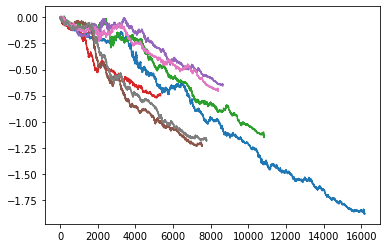

In [ ]:
#rsiを計算して入れる
periods = [15,25,45,65]

for period in periods:
    def inc(x):
      if x >= 0:
        return x
      else:
        return 0
    def dec(x):
      if x < 0:
        return -x
      else:
        return 0

    df_5m['diff'] = df_5m['close'].diff()
    df_5m['inc'] = df_5m['diff'].apply(inc)
    df_5m['dec'] = df_5m['diff'].apply(dec)
    df_5m['rsi'] = (df_5m['inc'].rolling(period).sum() / (df_5m['inc'].rolling(period).sum() + df_5m['dec'].rolling(period).sum())) * 100 - 50
    df_5m = df_5m.drop(['diff','inc','dec'], axis=1)

    def get_judge(x):
      if x > 0:
        return 1
      else:
        return 0

    df_5m['judge'] = df_5m['rsi'].apply(get_judge)

    timing = []
    bidask = []
    price = []
    trend = []
    df_result = pd.DataFrame([], columns=['date', 'direction', 'price'])
    for i in range(len(df_5m)):
      if df_5m.iat[i,8] != '':
        timing.append(df_5m.iat[i,0])
        bidask.append( df_5m.iat[i,8])
        price.append(df_5m.iat[i,1])
        trend.append(df_5m.at[i-1,'judge'])

    df_result = pd.DataFrame(data={'date':timing, 'direction':bidask, 'price':price, 'judge':trend},\
                                columns=['date','direction','price','judge'])

    df_result['profit'] = None
    df_result['profit'].astype(float)
    for i in range(len(df_result)-1):
      if df_result.iat[i,1] == '売':
        df_result.at[i,'profit'] = df_result.iat[i, 2] - df_result.iloc[i+1,2]
      elif df_result.iat[i,1] == '買':
        df_result.at[i,'profit'] = df_result.iat[i+1,2] - df_result.iat[i,2]

    df_result_buy = df_result[df_result['direction'] == '買']
    df_result_sell = df_result[df_result['direction'] == '売']

    print(period,df_result_buy.groupby('judge')['profit'].sum(),df_result_sell.groupby('judge')['profit'].sum())

    df_trend = df_result_buy[df_result_buy['judge']==1]
    df_range = df_result_buy[df_result_buy['judge']==0]
    def get_plots(dfs):
        df = dfs.copy().reset_index()
        df['ruiseki'] = None
        df.at[0, 'ruiseki'] = 0
        for i in range(1, len(df)-1):
          df.at[i,'ruiseki'] = df.at[i,'profit'] + df.at[i-1,'ruiseki']
        plt.plot(df['ruiseki'])
        # print(df)
    get_plots(df_trend)
    get_plots(df_range)



In [ ]:
df_5m['rsi'].describe()

count    1.112573e+06
mean     5.629963e-02
std      1.574462e+01
min     -5.000000e+01
25%     -1.103286e+01
50%      0.000000e+00
75%      1.111111e+01
max      5.000000e+01
Name: rsi, dtype: float64

In [ ]:
df_5m['ma'] = None
df_5m['diff'] = None
df_5m['trend'] = None
df_5m['ma'] = pd.DataFrame(df_5m['close'].rolling(10).mean())
df_5m['diff'] = df_5m['ma'].diff()
def get_trend_direction(diff):
  if diff >=0:
    trend = '↑'
  else:
    trend = '↓'
  return trend
df_5m['trend'] = df_5m['diff'].apply(get_trend_direction)

In [ ]:
# df_5m.iloc[0:60,:]

In [ ]:
#candle pattern使うなら実行
timing    = []
bidask = []
price = []

df_result = pd.DataFrame([], columns=['date', 'direction', 'price'])
for i in range(len(df_5m)):
  if df_5m.iat[i,8] != '':
    timing.append(df_5m.iat[i,0])
    bidask.append( df_5m.iat[i,8])
    price.append(df_5m.iat[i,1])

  if i % 10000 == 0:
    print(str(i)+'行まで完了')
df_result = pd.DataFrame(data={'date':timing, 'direction':bidask, 'price':price},\
                          columns=['date','direction','price'])
print(len(df_result))
    

0行まで完了
10000行まで完了
20000行まで完了
30000行まで完了
40000行まで完了
50000行まで完了
60000行まで完了
70000行まで完了
80000行まで完了
90000行まで完了
100000行まで完了
110000行まで完了
120000行まで完了
130000行まで完了
140000行まで完了
150000行まで完了
160000行まで完了
170000行まで完了
180000行まで完了
190000行まで完了
200000行まで完了
210000行まで完了
220000行まで完了
230000行まで完了
240000行まで完了
250000行まで完了
260000行まで完了
270000行まで完了
280000行まで完了
290000行まで完了
300000行まで完了
310000行まで完了
320000行まで完了
330000行まで完了
340000行まで完了
350000行まで完了
360000行まで完了
370000行まで完了
380000行まで完了
390000行まで完了
400000行まで完了
410000行まで完了
420000行まで完了
430000行まで完了
440000行まで完了
450000行まで完了
460000行まで完了
470000行まで完了
480000行まで完了
490000行まで完了
500000行まで完了
510000行まで完了
520000行まで完了
530000行まで完了
540000行まで完了
550000行まで完了
560000行まで完了
570000行まで完了
580000行まで完了
590000行まで完了
600000行まで完了
610000行まで完了
620000行まで完了
630000行まで完了
640000行まで完了
650000行まで完了
660000行まで完了
670000行まで完了
680000行まで完了
690000行まで完了
700000行まで完了
710000行まで完了
720000行まで完了
730000行まで完了
740000行まで完了
750000行まで完了
760000行まで完了
770000行まで完了
780000行まで完了
790000行まで完了
800000行まで完了
810000行まで完了
820000行まで完了
830000行まで完了
840000

In [ ]:
print(len(df_result))
# print(df_result_buy.head(50))
# print(df_result_buy.tail(50))
print(df_result.tail(50))
# print(df_result_buy.iloc[1900:1950,:])

In [ ]:
# イン→→一つ目のエグジットでプラスならスルー→→次のエントリーでプラスならスルー→→2つめのエグジットで出る
# スルー条件に当てはまらないならエグジット
df_result['profit'] = None
df_result['profit'].astype(float)
print(len(df_result))
for i in range(len(df_result)-4):
    if df_result.iat[i,1] == '売':
        entry1 = df_result.iat[i,2]
        exit1 = df_result.iat[i+1,2]
        entry2 = df_result.iat[i+2,2]
        exit2 = df_result.iat[i+3,2]
        if entry1 - exit1 <= 0:
          if entry1 - entry2 <= 0:
            df_result.iat[i,3] = entry1 - exit2
          else:
            df_result.iat[i,3] = entry1 - entry2
        else:
          df_result.iat[i,3] = entry1 - exit1
    elif df_result.iat[i,1] == '買':
        entry1 = df_result.iat[i,2]
        exit1 = df_result.iat[i+1,2]
        entry2 = df_result.iat[i+2,2]
        exit2 = df_result.iat[i+3,2]
        if exit1 - entry1 <= 0:
          if entry2 - entry1 <= 0:
            df_result.iat[i,3] = exit2 - entry1
          else:
            df_result.iat[i,3] = entry2 - entry1
        else:
          df_result.iat[i,3] = exit1 - entry1
    if i % 1000 == 0:
      print(i)


45550
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000


In [ ]:
# イン→→一つ目のエグジットでマイナスならスルー→→次のエントリーでマイナスならスルー→→2つめのエグジットで出る
# スルー条件に当てはまらないならエグジット
df_result['profit'] = None
df_result['profit'].astype(float)
print(len(df_result))
for i in range(len(df_result)-4):
    if df_result.iat[i,1] == '売':
        entry1 = df_result.iat[i,2]
        exit1 = df_result.iat[i+1,2]
        entry2 = df_result.iat[i+2,2]
        exit2 = df_result.iat[i+3,2]
        if entry1 - exit1 >= 0:
          if entry1 - entry2 >= 0:
            df_result.iat[i,3] = entry1 - exit2
          else:
            df_result.iat[i,3] = entry1 - entry2
        else:
          df_result.iat[i,3] = entry1 - exit1
    elif df_result.iat[i,1] == '買':
        entry1 = df_result.iat[i,2]
        exit1 = df_result.iat[i+1,2]
        entry2 = df_result.iat[i+2,2]
        exit2 = df_result.iat[i+3,2]
        if exit1 - entry1 >= 0:
          if entry2 - entry1 >= 0:
            df_result.iat[i,3] = exit2 - entry1
          else:
            df_result.iat[i,3] = entry2 - entry1
        else:
          df_result.iat[i,3] = exit1 - entry1
    if i % 1000 == 0:
      print(i)

78066
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000


In [ ]:
#一つずつトレード
df_result['profit'] = None
df_result['profit'].astype(float)
for i in range(len(df_result)-1):
  if df_result.iat[i,1] == '売':
    df_result.at[i,'profit'] = df_result.iat[i, 2] - df_result.iloc[i+1,2]
  elif df_result.iat[i,1] == '買':
    df_result.at[i,'profit'] = df_result.iat[i+1,2] - df_result.iat[i,2]

In [ ]:
# df_result.to_csv('./drive/My Drive/Colab Notebooks/5m_bolinger_break_nofiltered.csv',encoding='utf_8_sig')

In [ ]:
# df_result['ruiseki'] = None
# df_result['ruiseki'].astype(float)
# df_result.iat[0,4] = df_result.iat[0,3]
# for i in range(1,len(df_result)-4):
#   df_result.iat[i,4] = df_result.iat[i-1,4] + df_result.iat[i,3]
# df_result['ruiseki'].plot()
# df_result['ruiseki'] = None

In [ ]:
# df_result['label'] = None
# boarder = 0.015
# for i in range(len(df_result)):
#   try:

#     # if boarder <= df_result.iat[i,3]:
#     #   df_result.iat[i,5] = 0
#     # elif - boarder < df_result.iat[i,3] and df_result.iat[i,3] < boarder:
#     #   df_result.iat[i,5] = 1
#     # elif df_result.iat[i,3] <= - boarder:
#     #   df_result.iat[i,5] = 2
#     # else:
#     #   assert False, 'Error'

#     if df_result.iat[i,3] <= -boarder:
#       df_result.iat[i,5] = 1
#     elif -boarder < df_result.iat[i,3]:
#       df_result.iat[i,5] = 0
#     else:
#       assert False, 'Error'

#   except Exception as err:
#     print(err.args)
#     continue

("'<=' not supported between instances of 'NoneType' and 'float'",)


In [ ]:
df_result_buy = df_result[df_result['direction'] == '買']
df_result_sell = df_result[df_result['direction'] == '売']
print(df_result_buy.head(60))
print(df_result_sell.head())

                   date direction   price  profit
1   2005-01-10 17:00:00         買  1.3112 -0.0024
3   2005-01-10 19:25:00         買  1.3112 -0.0028
5   2005-01-11 02:00:00         買  1.3102  0.0013
7   2005-01-11 12:40:00         買  1.3141  0.0001
9   2005-01-11 17:30:00         買  1.3161 -0.0043
11  2005-01-12 14:55:00         買  1.3112  0.0118
13  2005-01-13 14:15:00         買  1.3239  -0.002
15  2005-01-13 23:55:00         買  1.3222 -0.0032
17  2005-01-14 10:15:00         買  1.3127 -0.0024
19  2005-01-14 12:50:00         買  1.3115 -0.0024
21  2005-01-14 17:50:00         買  1.3108 -0.0015
23  2005-01-18 06:30:00         買  1.3043 -0.0025
25  2005-01-18 13:30:00         買  1.3037  0.0008
27  2005-01-18 19:30:00         買  1.3040 -0.0022
29  2005-01-19 04:30:00         買  1.3033 -0.0024
31  2005-01-19 10:50:00         買  1.3036  0.0037
33  2005-01-19 23:55:00         買  1.3004 -0.0015
35  2005-01-20 16:35:00         買  1.2953 -0.0004
37  2005-01-21 10:35:00         買  1.2966  0.0004


In [ ]:
df_result_buy['profit'].cumsum()

1        -0.0024
3        -0.0052
5        -0.0039
7        -0.0038
9        -0.0081
          ...   
13969    -0.8551
13971   -0.84598
13973   -0.84871
13975   -0.85179
13977        NaN
Name: profit, Length: 6989, dtype: object

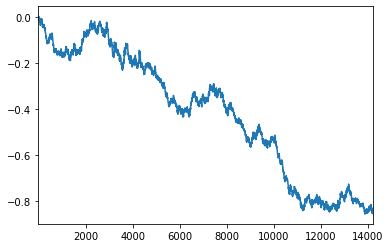

In [ ]:
df_result_buy['profit'].cumsum().plot()

In [ ]:
df_result_buy.groupby('trend')['profit'].sum()

KeyError: ignored

In [ ]:
periods = [10,20,30]
diff_periods = [3,5,10]
for period, diff_period in product(periods, diff_periods):

    df_5m['ma'] = None
    df_5m['diff'] = None
    df_5m['trend'] = None
    df_5m['ma'] = pd.DataFrame(df_5m['close'].rolling(period).mean())
    df_5m['diff'] = df_5m['ma'].diff(periods=diff_period)
    def get_trend_direction(diff):
      if diff >=0:
        trend = '↑'
      else:
        trend = '↓'
      return trend
    df_5m['trend'] = df_5m['diff'].apply(get_trend_direction)

    timing = []
    bidask = []
    price = []
    trend = []
    df_result = pd.DataFrame([], columns=['date', 'direction', 'price'])
    for i in range(len(df_5m)):
      if df_5m.iat[i,8] != '':
        timing.append(df_5m.iat[i,0])
        bidask.append( df_5m.iat[i,8])
        price.append(df_5m.iat[i,1])
        trend.append(df_5m.at[i-1,11])

    df_result = pd.DataFrame(data={'date':timing, 'direction':bidask, 'price':price, 'trend':trend},\
                                columns=['date','direction','price','trend'])

    df_result['profit'] = None
    df_result['profit'].astype(float)
    for i in range(len(df_result)-1):
      if df_result.iat[i,1] == '売':
        df_result.at[i,'profit'] = df_result.iat[i, 2] - df_result.iloc[i+1,2]
      elif df_result.iat[i,1] == '買':
        df_result.at[i,'profit'] = df_result.iat[i+1,2] - df_result.iat[i,2]

    df_result_buy = df_result[df_result['direction'] == '買']
    df_result_sell = df_result[df_result['direction'] == '売']

    print(period,df_result_buy.groupby('trend')['profit'].sum(),df_result_sell.groupby('trend')['profit'].sum())



10 trend
↑   -1.80540
↓   -0.65707
Name: profit, dtype: float64 trend
↑   -0.30909
↓   -1.91215
Name: profit, dtype: float64
10 trend
↑   -1.36502
↓   -1.09745
Name: profit, dtype: float64 trend
↑   -0.74174
↓   -1.47950
Name: profit, dtype: float64
10 trend
↑   -0.86042
↓   -1.60205
Name: profit, dtype: float64 trend
↑   -1.31818
↓   -0.90306
Name: profit, dtype: float64
20 trend
↑   -0.86297
↓   -1.59950
Name: profit, dtype: float64 trend
↑   -1.38338
↓   -0.83786
Name: profit, dtype: float64
20 trend
↑   -0.56209
↓   -1.90038
Name: profit, dtype: float64 trend
↑   -1.45461
↓   -0.76663
Name: profit, dtype: float64
20 trend
↑   -0.49199
↓   -1.97048
Name: profit, dtype: float64 trend
↑   -1.50014
↓   -0.72110
Name: profit, dtype: float64
30 trend
↑   -0.94991
↓   -1.51256
Name: profit, dtype: float64 trend
↑   -1.13958
↓   -1.08166
Name: profit, dtype: float64
30 trend
↑   -0.76659
↓   -1.69588
Name: profit, dtype: float64 trend
↑   -1.08032
↓   -1.14092
Name: profit, dtype: float64


In [ ]:
periods = [20]

for period in periods:

    df_5m['ma'] = None

    df_5m['trend'] = None
    # df_5m['ma'] = pd.DataFrame(df_5m['close'].rolling(period).mean())
    df_5m['ma'] = pd.DataFrame(df_5m['close'].rolling(period).std(ddof=0))

    # def get_vsma_direction(x):
    #   if x[0] - x[1] >=0:
    #     trend = '↑'
    #   else:
    #     trend = '↓'
    #   return trend
    # df_5m['trend'] = df_5m[['close','ma']].apply(get_vsma_direction,axis=1)

    def get_range_or_not(x):
      if x >= 0.0004:
        trend = 1
      else:
        trend = 0
      return trend
    df_5m['trend'] = df_5m['ma'].apply(get_range_or_not)

    print('finish applying')
    timing = []
    bidask = []
    price = []
    trend = []
    df_result = pd.DataFrame([], columns=['date', 'direction', 'price'])
    for i in range(len(df_5m)):
      if df_5m.iat[i,8] != '':
        timing.append(df_5m.iat[i,0])
        bidask.append( df_5m.iat[i,8])
        price.append(df_5m.iat[i,1])
        trend.append(df_5m.iat[i-1,10])

    df_result = pd.DataFrame(data={'date':timing, 'direction':bidask, 'price':price, 'trend':trend},\
                                columns=['date','direction','price','trend'])

    df_result['profit'] = None
    df_result['profit'].astype(float)
    for i in range(len(df_result)-1):
      if df_result.iat[i,1] == '売':
        df_result.at[i,'profit'] = df_result.iat[i, 2] - df_result.iloc[i+1,2]
      elif df_result.iat[i,1] == '買':
        df_result.at[i,'profit'] = df_result.iat[i+1,2] - df_result.iat[i,2]

    df_result_buy = df_result[df_result['direction'] == '買']
    df_result_sell = df_result[df_result['direction'] == '売']

    print(period,df_result_buy.groupby('trend')['profit'].sum(),df_result_sell.groupby('trend')['profit'].sum())

finish applying
20 trend
0   -0.78725
1   -1.67522
Name: profit, dtype: float64 trend
0   -1.09675
1   -1.12449
Name: profit, dtype: float64


In [ ]:
df_5m

In [ ]:
df_bear = df_result_buy[df_result_buy['trend']=='↓']
df_bull = df_result_buy[df_result_buy['trend']=='↑']
def get_plots(dfs):
    df = dfs.copy().reset_index()
    df['ruiseki'] = None
    df.at[0, 'ruiseki'] = 0
    for i in range(1, len(df)-1):
      df.at[i,'ruiseki'] = df.at[i,'profit'] + df.at[i-1,'ruiseki']
    plt.plot(df['ruiseki'])
    print(df)
get_plots(df_bear)
get_plots(df_bull)

     index                date direction    price  judge   profit  ruiseki
0       27 2005-01-12 16:35:00         買  1.32240      1    0.005        0
1      107 2005-01-21 16:55:00         買  1.29720      1   0.0074   0.0074
2      209 2005-02-04 16:35:00         買  1.30290      1  -0.0087  -0.0013
3      239 2005-02-10 00:35:00         買  1.28080      1  -0.0004  -0.0017
4      311 2005-02-18 06:15:00         買  1.30670      1  -0.0001  -0.0018
..     ...                 ...       ...      ...    ...      ...      ...
726  45383 2020-03-02 12:15:00         買  1.10898      1  0.00239   0.0024
727  45391 2020-03-03 04:25:00         買  1.11385      1 -0.00023  0.00217
728  45449 2020-03-09 10:10:00         買  1.14363      1 -0.00125  0.00092
729  45479 2020-03-11 14:00:00         買  1.13261      1   -6e-05  0.00086
730  45541 2020-03-20 04:20:00         買  1.06819      1  0.00381     None

[731 rows x 7 columns]
       index                date direction    price  judge   profit  ruiseki

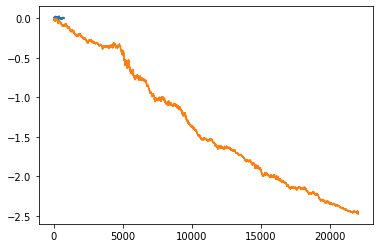

In [ ]:
df_trend = df_result_buy[df_result_buy['judge']==1]
df_range = df_result_buy[df_result_buy['judge']==0]
def get_plots(dfs):
    df = dfs.copy().reset_index()
    df['ruiseki'] = None
    df.at[0, 'ruiseki'] = 0
    for i in range(1, len(df)-1):
      df.at[i,'ruiseki'] = df.at[i,'profit'] + df.at[i-1,'ruiseki']
    plt.plot(df['ruiseki'])
    print(df)
get_plots(df_trend)
get_plots(df_range)

In [ ]:
# series_profit = df_result_buy['profit'] > 0
# print(len(df_result_buy))
# print(series_profit.sum())
# print(series_profit.sum() / len(df_result_buy))
# series_profit = df_result_sell['profit'] > 0
# print(len(df_result_sell))
# print(series_profit.sum())
# print(series_profit.sum() / len(df_result_sell))

37399
23536
0.6293216396160325
37399
23044
0.616166207652611


In [ ]:
#df_result_buy, df_result_sellの選択あり
def get_entry_candle_patterns(df):
    number_of_candles = 20
    matrix_data_buy = []
    labels_buy = []
    entry_candle_pattern_1d = []
    entry_candle_pattern_1h = []
    entry_candle_pattern_5m = []
    indices = []
    err_counter = 0
    print(len(df))

    for i in range(0,len(df)):
      search_year = df.iat[i,0].year
      search_month = df.iat[i,0].month
      search_day = df.iat[i,0].day
      search_hour = df.iat[i,0].hour
      search_minute = df.iat[i,0].minute

      try:
        action_index = df_1d[df_1d['date'] == pd.Timestamp(search_year,search_month,search_day)].index
        assert len(action_index) == 1, 'many indices:{},{}'.format(action_index,pd.Timestamp(search_year,search_month,search_day))
        index_num = action_index[0]
        if index_num <= number_of_candles - 1:
          continue
        df_data_1d = df_1d.iloc[index_num-number_of_candles:index_num, [1,2,3,4]]
        matrix_1d = np.array(df_data_1d)
        # print(df_result_buy.iat[i,0])
        # print(df_data_1d)
        
        
        action_index = df_1h[df_1h['date'] == pd.Timestamp(search_year,search_month,search_day,search_hour)].index
        assert len(action_index) == 1, 'many indices'
        index_num = action_index[0]
        df_data_1h = df_1h.iloc[index_num-number_of_candles:index_num, [1,2,3,4]]
        matrix_1h = np.array(df_data_1h)
        # print(df_result_buy.iat[i,0])
        # print(df_data_1h)

        action_index = df_5m[df_5m['date'] == pd.Timestamp(search_year,search_month,search_day,search_hour,search_minute)].index
        assert len(action_index) == 1, 'many indices'
        index_num = action_index[0]
        df_data_5m = df_5m.iloc[index_num-number_of_candles:index_num, [1,2,3,4]]
        matrix_5m = np.array(df_data_5m)
        # print(df_result_buy.iat[i,0])
        # print(df_data_5m)

        # matrix = np.concatenate([matrix_1d,matrix_1h,matrix_5m])
        # matrix = np.concatenate([matrix_1h,matrix_5m])
        # matrix = matrix_5m.copy()

        # matrix /=  df_5m.iat[index_num-1,4]
        # matrix -= 1
        # matrix *= 1000
        # matrix_data_buy.append(matrix)
        # labels_buy.append(df_result_buy.iat[i,3])
        # labels_buy.append(df_result_buy.iat[i,5])
        # if df_result_buy.iat[i,3] >= 0:
        #   labels_buy.append(0)
        # elif df_result_buy.iat[i,3] < 0:
        #   labels_buy.append(1)
        # else:
        #   assert False, 'erre in making labels'

        matrix_1d /=  df_5m.iat[index_num-1,4]
        matrix_1d -= 1
        matrix_1d *= 1000
        matrix_1h /=  df_5m.iat[index_num-1,4]
        matrix_1h -= 1
        matrix_1h *= 1000
        matrix_5m /=  df_5m.iat[index_num-1,4]
        matrix_5m -= 1
        matrix_5m *= 1000
        entry_candle_pattern_1d.append(matrix_1d)
        entry_candle_pattern_1h.append(matrix_1h)
        entry_candle_pattern_5m.append(matrix_5m)
        indices.append(i)

        if len(entry_candle_pattern_1d) == 1:
          print('初めに'+str(i)+'行が取引成功した')
          start = i

        if i % 1000 == 0:
          print(str(i)+'行まで終わった')

      except Exception as err:
        print(err.args)
        err_counter += 1
        continue
      
    print(err_counter)
    return  np.array(entry_candle_pattern_1d), np.array(entry_candle_pattern_1h), np.array(entry_candle_pattern_5m), start, indices


  

In [ ]:
entry_candle_pattern_1d ,entry_candle_pattern_1h, entry_candle_pattern_5m, start, indices = get_entry_candle_patterns(df_result_buy)
# entry_candle_pattern_1d ,entry_candle_pattern_1h, entry_candle_pattern_5m, start, indices = get_entry_candle_patterns(df_result_sell)

6989
初めに37行が取引成功した
1000行まで終わった
2000行まで終わった
3000行まで終わった
4000行まで終わった
5000行まで終わった
6000行まで終わった
0


In [ ]:
# matrix_1d

In [ ]:
# print(len(matrix_data_buy))
# print(len(labels))
# print(labels[-6:])
# del matrix_data_buy[len(matrix_data_buy)-1]
# del labels_buy[len(labels_buy)-1]
# matrix_data_buy = np.array(matrix_data_buy)
# labels_buy = np.array(labels_buy)
# print(matrix_data_buy.shape)
# print(labels_buy.shape)
# print(labels_buy[len(labels_buy)-1])
# print(matrix_data_buy[len(matrix_data_buy)-1])

In [ ]:
# print(len(matrix_data_buy))
# print(labels)
# print(labels[4])
# print(matrix_data_buy[4])

# print(df_1d[(df_1d['date'] > pd.Timestamp(2011,3,23)) & (df_1d['date'] < pd.Timestamp(2011,4,5))])
# print(df_5m[(df_5m['date'] >= pd.Timestamp(2011,3,26)) & (df_1d['date'] <= pd.Timestamp(2011,3,28))])
# print(df_result_buy[(df_result_buy['date'] >= pd.Timestamp(2015,3,7)) & (df_result_buy['date'] <= pd.Timestamp(2015,3,8))])
# df_result_buy = df_result_buy[df_result_buy['date'] != pd.Timestamp(2015,3,7,0,5,0)]
# print(df_result_buy[(df_result_buy['date'] >= pd.Timestamp(2015,3,6)) & (df_result_buy['date'] <= pd.Timestamp(2015,3,10))])

In [ ]:
# df_result_buy

In [ ]:
# df_5m.iloc[:100,1:].plot()
# df_result_buy.iloc[:,4].plot()
# df_result_sell.iloc[:,4].plot()

In [ ]:
# sns.distplot(df_result.iloc[:74797,3], kde=False, rug=False, bins=100) 

以下ラベルを利益損失で分けずに、
クラスタリングでラベルを生成することに挑戦

In [ ]:
from sklearn import datasets, cluster
import random
from sklearn.naive_bayes import MultinomialNB
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# digits = datasets.load_digits(n_class = 10)
# print(digits.data.shape)

In [ ]:
# print(matrix_data_buy.shape)

In [ ]:
# random_indices = [i for i in range(len(entry_candle_pattern_1d))]
# # random_indices = [i for i in range(25000,35000)]

# print(random_indices[:10])
# random.seed(10)

# random_indices = random.sample(random_indices, 10000)
# # random_indices = random.sample(random_indices, len(matrix_data_buy))

# print(random_indices[:20])
# for i in random_indices[:20]:
#   print(i,end=' ')

In [ ]:
# matrix_clustering = matrix_data_buy.reshape(len(matrix_data_buy), matrix_data_buy.shape[1] * matrix_data_buy.shape[2])
# matrix_clustering_randomsampled = []
# labels_clustering_randomsampled = []
# for i in random_indices:
#   matrix_clustering_randomsampled.append(matrix_clustering[i])
#   labels_clustering_randomsampled.append(labels_buy[i])
# matrix_clustering_randomsampled = np.array(matrix_clustering_randomsampled)
# print(matrix_clustering_randomsampled.shape)
# print(matrix_clustering_randomsampled[:3])


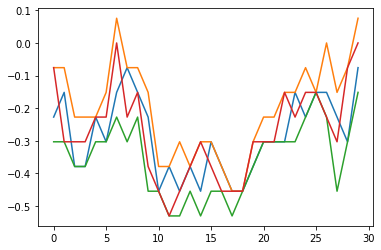

In [ ]:
plt.plot(entry_candle_pattern_5m[17])

In [ ]:
# def get_data_for_clustering(ndarray):
#     matrix_clustering = ndarray.reshape(len(ndarray), ndarray.shape[1] * ndarray.shape[2])
#     matrix_clustering_randomsampled = []
#     labels_clustering_randomsampled = []
#     for i in random_indices:
#       matrix_clustering_randomsampled.append(ndarray[i])
#       # matrix_clustering_randomsampled.append(matrix_clustering[i])
#       # labels_clustering_randomsampled.append(labels_buy[i])
#     matrix_clustering_randomsampled = np.array(matrix_clustering_randomsampled)
#     print(matrix_clustering_randomsampled.shape)
#     print(matrix_clustering_randomsampled[:3])
#     return matrix_clustering_randomsampled

# matrix_clustering_randomsampled_1d = get_data_for_clustering(entry_candle_pattern_1d)
# matrix_clustering_randomsampled_1h = get_data_for_clustering(entry_candle_pattern_1h)
# matrix_clustering_randomsampled_5m = get_data_for_clustering(entry_candle_pattern_5m)

In [ ]:
# matrix_clustering_randomsampled_1d.shape

In [ ]:
def make_and_learn_kmeans_model(data, bunruisuu):

  train_data = data.reshape(len(data), data.shape[1] * data.shape[2])
  model = cluster.KMeans(n_clusters=bunruisuu, init='k-means++',\
                        n_init=10, max_iter=300, tol=1e-04, random_state=0,\
                        verbose=0)



  model.fit(train_data)


  result = [0,0,0,0,0]
  label = ['0', '1', '2','3','4']

  for l in model.labels_:
    result[int(l)] += 1


  print(len(model.labels_))


  plt.subplot(1, 1, 1)
  plt.xlabel('results')
  plt.pie(x=result, labels=label, autopct='%.2f%%')
  plt.show()

  return model

In [ ]:
# matrix_clustering_randomsampled_1h.shape

In [ ]:
dummy_data = np.array([[[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[0.75,0.75,0.75,0.75],[0.75,0.75,0.75,0.75],[0.75,0.75,0.75,0.75],[0.75,0.75,0.75,0.75],[0.75,0.75,0.75,0.75],
                      [0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                      [[-4,-4,-4,-4],[-4,-4,-4,-4],[-4,-4,-4,-4],[-4,-4,-4,-4],[-3,-3,-3,-3],[-3,-3,-3,-3],[-3,-3,-3,-3],[-3,-3,-3,-3]
                       ,[-2,-2,-2,-2],[-2,-2,-2,-2],[-2,-2,-2,-2],[-2,-2,-2,-2],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1]
                      ,[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]]])
dummy_data2 = np.array([[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],
                        [0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                      [[-4,-4,-4,-4],[-4,-4,-4,-4],[-4,-4,-4,-4],[-4,-4,-4,-4],[-3,-3,-3,-3],[-3,-3,-3,-3],[-3,-3,-3,-3],[-3,-3,-3,-3]
                       ,[-2,-2,-2,-2],[-2,-2,-2,-2],[-2,-2,-2,-2],[-2,-2,-2,-2],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1]
                      ,[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]]])
dummy_data_for_5 = np.array([[[4,4,4,4],[3,3,3,3],
                         [2,2,2,2],[1,1,1,1],
                         [0.1,0.1,0.1,0.1]],
                         [[-4,-4,-4,-4],[-3,-3,-3,-3],
                         [-2,-2,-2,-2],[-1,-1,-1,-1],
                         [-0.1,-0.1,-0.1,-0.1]]])
dummy_data_for_10 = np.array([[[4,4,4,4],[4,4,4,4],[3,3,3,3],[3,3,3,3],
                         [2,2,2,2],[2,2,2,2],[1,1,1,1],[1,1,1,1],
                         [0.1,0.1,0.1,0.1],[0.1,0.1,0.1,0.1]],
                         [[-4,-4,-4,-4],[-4,-4,-4,-4],[-3,-3,-3,-3],[-3,-3,-3,-3],
                         [-2,-2,-2,-2],[-2,-2,-2,-2],[-1,-1,-1,-1],[-1,-1,-1,-1],
                         [-0.1,-0.1,-0.1,-0.1],[-0.1,-0.1,-0.1,-0.1]]])
dummy_data_for_20 = np.array([[[4,4,4,4],[4,4,4,4],[4,4,4,4],[4,4,4,4],[3,3,3,3],[3,3,3,3],[3,3,3,3],[3,3,3,3],
                         [2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],
                         [0.1,0.1,0.1,0.1],[0.1,0.1,0.1,0.1],[0.1,0.1,0.1,0.1],[0.1,0.1,0.1,0.1]],
                         [[-4,-4,-4,-4],[-4,-4,-4,-4],[-4,-4,-4,-4],[-4,-4,-4,-4],[-3,-3,-3,-3],[-3,-3,-3,-3],[-3,-3,-3,-3],[-3,-3,-3,-3],
                         [-2,-2,-2,-2],[-2,-2,-2,-2],[-2,-2,-2,-2],[-2,-2,-2,-2],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1],
                         [-0.1,-0.1,-0.1,-0.1],[-0.1,-0.1,-0.1,-0.1],[-0.1,-0.1,-0.1,-0.1],[-0.1,-0.1,-0.1,-0.1]]])
dummy_data_for_20_3 = np.array([[[4,4,4,4],[4,4,4,4],[4,4,4,4],[4,4,4,4],[3,3,3,3],[3,3,3,3],[3,3,3,3],[3,3,3,3],
                         [2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],
                         [0.1,0.1,0.1,0.1],[0.1,0.1,0.1,0.1],[0.1,0.1,0.1,0.1],[0.1,0.1,0.1,0.1]],
                         [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],
                          [0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],
                          [0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                         [[-4,-4,-4,-4],[-4,-4,-4,-4],[-4,-4,-4,-4],[-4,-4,-4,-4],[-3,-3,-3,-3],[-3,-3,-3,-3],[-3,-3,-3,-3],[-3,-3,-3,-3],
                         [-2,-2,-2,-2],[-2,-2,-2,-2],[-2,-2,-2,-2],[-2,-2,-2,-2],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1],
                         [-0.1,-0.1,-0.1,-0.1],[-0.1,-0.1,-0.1,-0.1],[-0.1,-0.1,-0.1,-0.1],[-0.1,-0.1,-0.1,-0.1]]])
dummy_data_for_20_3_kyu = np.array([[[5,5,5,5],[5,5,5,5],[4,4,4,4],[4,4,4,4],[3,3,3,3],[3,3,3,3],[3,3,3,3],[3,3,3,3],
                         [2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],
                         [0.1,0.1,0.1,0.1],[0.1,0.1,0.1,0.1],[0.1,0.1,0.1,0.1],[0.1,0.1,0.1,0.1]],
                         [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],
                          [0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],
                          [0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                         [[-5,-5,-5,-5],[-5,-5,-5,-5],[-4,-4,-4,-4],[-4,-4,-4,-4],[-3,-3,-3,-3],[-3,-3,-3,-3],[-3,-3,-3,-3],[-3,-3,-3,-3],
                         [-2,-2,-2,-2],[-2,-2,-2,-2],[-2,-2,-2,-2],[-2,-2,-2,-2],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1],
                         [-0.1,-0.1,-0.1,-0.1],[-0.1,-0.1,-0.1,-0.1],[-0.1,-0.1,-0.1,-0.1],[-0.1,-0.1,-0.1,-0.1]]])
dummy_data_for_30 = np.array([[[4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1]],
                         [[-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1]]])
dummy_data_for_30_3 = np.array([[[4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1]],
                         [[0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0],
                          [0,0,0,0]],
                         [[-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1]]])
dummy_data5 = np.array([[[4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [4,4,4,4],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [3,3,3,3],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [2,2,2,2],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [1,1,1,1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1]],
                         [[-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-4,-4,-4,-4],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-3,-3,-3,-3],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-2,-2,-2,-2],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-1,-1,-1,-1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1],
                          [-0.1,-0.1,-0.1,-0.1]]])
dummy_data_for_3 = np.array([[
                         [2,2,2,2],
                         [1,1,1,1],                     
                         [0.1,0.1,0.1,0.1]],
                         [[-2,-2,-2,-2],
                          [-1,-1,-1,-1],
                          [-0.1,-0.1,-0.1,-0.1]]])
dummy_data_for_5 = np.array([[[4,4,4,4],
                              [3,3,3,3],
                              [2,2,2,2],
                              [1,1,1,1],
                              [0.1,0.1,0.1,0.1]],
                              [[-4,-4,-4,-4],
                                [-3,-3,-3,-3],
                                [-2,-2,-2,-2],
                                [-1,-1,-1,-1],
                                [-0.1,-0.1,-0.1,-0.1]]])
dummy_data_for_10 = np.array([[[4,4,4,4],
                              [4,4,4,4],
                              [3,3,3,3],
                              [3,3,3,3],
                              [2,2,2,2],
                              [2,2,2,2],
                              [1,1,1,1],
                              [1,1,1,1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1]],
                              [[-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1]]])
dummy_data_for_15 = np.array([[[4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1]],
                              [[-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1]]])
dummy_data_for_25 = np.array([[[4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1]],
                              [[-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1]]])
dummy_data_for_80 = np.array([[[4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [4,4,4,4],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [3,3,3,3],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [2,2,2,2],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [1,1,1,1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1],
                              [0.1,0.1,0.1,0.1]],
                              [[-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-4,-4,-4,-4],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-3,-3,-3,-3],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-2,-2,-2,-2],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-1,-1,-1,-1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1],
                               [-0.1,-0.1,-0.1,-0.1]]])
print(dummy_data_for_30_3)



[[[ 4.   4.   4.   4. ]
  [ 4.   4.   4.   4. ]
  [ 4.   4.   4.   4. ]
  [ 4.   4.   4.   4. ]
  [ 4.   4.   4.   4. ]
  [ 4.   4.   4.   4. ]
  [ 3.   3.   3.   3. ]
  [ 3.   3.   3.   3. ]
  [ 3.   3.   3.   3. ]
  [ 3.   3.   3.   3. ]
  [ 3.   3.   3.   3. ]
  [ 3.   3.   3.   3. ]
  [ 2.   2.   2.   2. ]
  [ 2.   2.   2.   2. ]
  [ 2.   2.   2.   2. ]
  [ 2.   2.   2.   2. ]
  [ 2.   2.   2.   2. ]
  [ 2.   2.   2.   2. ]
  [ 1.   1.   1.   1. ]
  [ 1.   1.   1.   1. ]
  [ 1.   1.   1.   1. ]
  [ 1.   1.   1.   1. ]
  [ 1.   1.   1.   1. ]
  [ 1.   1.   1.   1. ]
  [ 0.1  0.1  0.1  0.1]
  [ 0.1  0.1  0.1  0.1]
  [ 0.1  0.1  0.1  0.1]
  [ 0.1  0.1  0.1  0.1]
  [ 0.1  0.1  0.1  0.1]
  [ 0.1  0.1  0.1  0.1]]

 [[ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   

In [ ]:
#3つに分類
start_num = 4
stop = 0
candles = 10

dummy_data_a = np.linspace(start_num,stop,candles)
dummy_data_a = np.array([dummy_data_a,dummy_data_a,dummy_data_a,dummy_data_a]).T
dummy_data_b = np.linspace(-start_num,stop,candles)
dummy_data_b = np.array([dummy_data_b,dummy_data_b,dummy_data_b,dummy_data_b]).T
dummy_data_c = np.zeros((4,candles))
dummy_data_c = dummy_data_c.T
dummy_data = np.array([dummy_data_b,dummy_data_c,dummy_data_a])
bunruisuu = 3


In [ ]:
np.linspace(-start_num,stop,candles)

array([-4.2       , -3.73333333, -3.26666667, -2.8       , -2.33333333,
       -1.86666667, -1.4       , -0.93333333, -0.46666667,  0.        ])

In [ ]:
start_num = 4
stop = 0
candles = 20
dummy_data_a = np.linspace(-start_num,stop,candles)
dummy_data_a = np.array([dummy_data_a,dummy_data_a,dummy_data_a,dummy_data_a]).T
# dummy_data_a = np.zeros((4,int(shape)))
# dummy_data_a = dummy_data_a.T
dummy_data_b = np.linspace(start_num,stop,candles)
dummy_data_b = np.array([dummy_data_b,dummy_data_b,dummy_data_b,dummy_data_b]).T
# dummy_data_b = np.zeros((4,int(shape)))
# dummy_data_b = dummy_data_b.T
dummy_data = np.array([dummy_data_b,dummy_data_a])
bunruisuu = 2

In [ ]:
start_num = 4
stop = 0
step = 0.2
shape = round(start_num / step)
dummy_data_a = np.arange(-start_num,stop,step)
dummy_data_a = np.array([dummy_data_a,dummy_data_a,dummy_data_a,dummy_data_a]).T
dummy_data_b = np.arange(-start_num/2,stop,step/2)
dummy_data_b = np.array([dummy_data_b,dummy_data_b,dummy_data_b,dummy_data_b]).T
dummy_data_c = np.arange(start_num/2,stop,-step/2)
dummy_data_c = np.array([dummy_data_c,dummy_data_c,dummy_data_c,dummy_data_c]).T
dummy_data_d = np.arange(start_num,stop,-step)
dummy_data_d = np.array([dummy_data_d,dummy_data_d,dummy_data_d,dummy_data_d]).T
dummy_data = np.array([dummy_data_d,dummy_data_c,dummy_data_b,dummy_data_a])
bunruisuu = 4

In [ ]:

# print(dummy_data[1].shape)
# print(dummy_data)

2


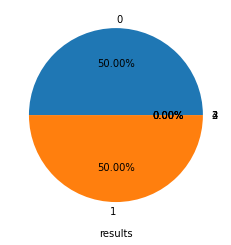

2


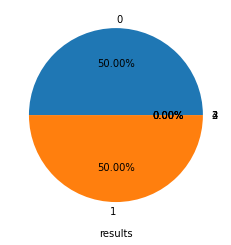

2


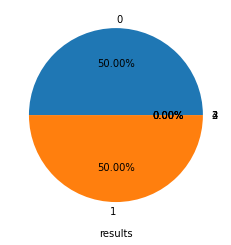

In [ ]:
# kmeans_1d_model = make_and_learn_kmeans_model(matrix_clustering_randomsampled_1d,2)
# kmeans_1h_model = make_and_learn_kmeans_model(matrix_clustering_randomsampled_1h,2)
# kmeans_1d_model = make_and_learn_kmeans_model(dummy_data_for_30_3,3)
# kmeans_1h_model = make_and_learn_kmeans_model(dummy_data_for_30_3,3)
# kmeans_5m_model = make_and_learn_kmeans_model(dummy_data_for_30_3,3)
# kmeans_1d_model = make_and_learn_kmeans_model(dummy_data_for_10,2)
# kmeans_1h_model = make_and_learn_kmeans_model(dummy_data_for_10,2)
# kmeans_5m_model = make_and_learn_kmeans_model(dummy_data_for_10,2)
kmeans_1d_model = make_and_learn_kmeans_model(dummy_data,bunruisuu)
kmeans_1h_model = make_and_learn_kmeans_model(dummy_data,bunruisuu)
kmeans_5m_model = make_and_learn_kmeans_model(dummy_data,bunruisuu)
# kmeans_5m_model = make_and_learn_kmeans_model(matrix_clustering_randomsampled_5m,2)
# kmeans_1d_model = make_and_learn_kmeans_model(entry_candle_pattern_1d,3)
# kmeans_1h_model = make_and_learn_kmeans_model(entry_candle_pattern_1h,3)
# kmeans_5m_model = make_and_learn_kmeans_model(entry_candle_pattern_5m,3)

In [ ]:
#エルボー法
# distortions = []
# for i  in range(1,5):                # 1~10クラスタまで一気に計算 
#     model = cluster.KMeans(n_clusters=i,
#                 init='k-means++',     # k-means++法によりクラスタ中心を選択
#                 n_init=10,
#                 max_iter=300,
#                 random_state=0)
#     model = GaussianMixture(n_components=i,init_params='kmeans')

#     model.fit(matrix_clustering[:len(matrix_clustering_randomsampled)]) # クラスタリングの計算を実行
    
#     # distortions.append(model.inertia_)   # model.fitするとmodel.inertia_が得られる
#     distortions.append(model.bic(matrix_clustering[:len(matrix_clustering_randomsampled)]))   # model.fitするとmodel.inertia_が得られる

# plt.plot(range(1,5),distortions,marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.show()

(2, 40)
(2, 10)


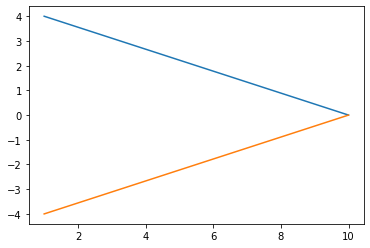

(2, 40)
(2, 10)


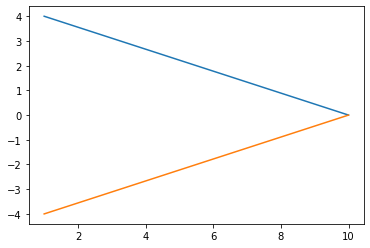

(2, 40)
(2, 10)


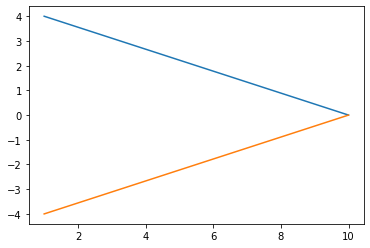

In [ ]:
#セントロイドを入力データ型で再現
def show_centroids_in_plot(model,bunruisuu):
    centroids = model.cluster_centers_
    print(centroids.shape)
    centroids = centroids.reshape(len(centroids),centroids.shape[1]//4,4)
    centroids_close = centroids[:,:,3]
    print(centroids_close.shape)
    x = []
    for i in range(bunruisuu):
      x.append(centroids_close[i][0:])
      plt.plot(np.linspace(1,len(x[0]),len(x[0])),x[i])
    plt.show()
show_centroids_in_plot(kmeans_1d_model,bunruisuu)
show_centroids_in_plot(kmeans_1h_model,bunruisuu)
show_centroids_in_plot(kmeans_5m_model,bunruisuu)

(3, 40)
(3, 10)


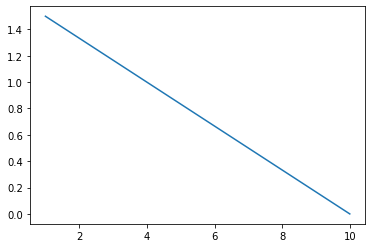

In [ ]:
centroids = kmeans_1h_model.cluster_centers_
print(centroids.shape)
centroids = centroids.reshape(len(centroids),centroids.shape[1]//4,4)
centroids_close = centroids[:,:,3]
print(centroids_close.shape)
x = []
for i in [1]:
  x.append(centroids_close[i][0:])
  plt.plot(np.linspace(1,len(x[0]),len(x[0])),x[0])
plt.show()

In [ ]:
#  centroids = kmeans_1h_model.cluster_centers_
#  centroids = centroids.reshape(len(centroids),centroids.shape[1]//4,4)
#  centroids_close1 = centroids[0,:,3]
#  centroids_close2 = centroids[1,:,3]
#  print(centroids.shape)
#  print(centroids_close1)
#  print(centroids_close2)

In [ ]:
print(entry_candle_pattern_1d.shape)
print(entry_candle_pattern_1h.shape)
print(entry_candle_pattern_5m.shape)


(55807, 30, 4)
(55807, 30, 4)
(55807, 30, 4)


In [ ]:
# df_result_buy

In [ ]:
#修正版
#一部の取引クラスタリング結果でできたモデルを用いて、すべての取引のクラスタリングを行う
#df_result_buy, df_result_sellの選択あり
def get_filtered_result(df_result, data, models):

    df = df_result.copy()
    df['predict_1d'] = None
    df['predict_1h'] = None
    df['predict_5m'] = None
    for j,model in enumerate(models):
      predict_labels = model.predict(data[j].reshape(len(data[j]), data[j].shape[1] * data[j].shape[2]))
      for p,i in enumerate(indices):
        df.iat[i,4 + j] = int(predict_labels[p])
    return df.iloc[start:start+len(data[j]),:]



In [ ]:
filtered_result = get_filtered_result(df_result_buy, [entry_candle_pattern_1d, entry_candle_pattern_1h, entry_candle_pattern_5m]
                                       ,[kmeans_1d_model,kmeans_1h_model,kmeans_5m_model])
# filtered_result = get_filtered_result(df_result_sell, [entry_candle_pattern_1d, entry_candle_pattern_1h, entry_candle_pattern_5m]
#                                        ,[kmeans_1d_model,kmeans_1h_model,kmeans_5m_model])

In [ ]:
# df_result_buy = df_result_buy[['date','direction','price','profit']]
# df_result_sell = df_result_sell[['date','direction','price','profit']]

In [ ]:
# filtered_result.tail(50)

In [ ]:
# #部分集合から予測用
# start = 171
# kosuu = len(matrix_clustering)
# predict_labels = model.predict(matrix_clustering)
# df_result_buy['predict'] = None

# for i in range(kosuu):
#   df_result_buy.iat[i+start,6] = int(predict_labels[i])
#   if i % 1000 == 0:
#     print(str(i) + '行まで完了')
# df_clustered = df_result_buy.iloc[start:start+kosuu,:]

In [ ]:
# df_clustered.tail()

In [ ]:

df_label_1d = []
df_label_1h = []
df_label_5m = []
for i in range(bunruisuu):
  df_label_1d.append(filtered_result[filtered_result['predict_1d'] == i].copy())
  print('1d')
  print(df_label_1d[i].count())
  print(df_label_1d[i]['profit'].sum())
for i in range(bunruisuu):
  print('1h')
  df_label_1h.append(filtered_result[filtered_result['predict_1h'] == i].copy())
  print(df_label_1h[i].count())
  print(df_label_1h[i]['profit'].sum())
for i in range(bunruisuu):
  print('5m')
  df_label_5m.append(filtered_result[filtered_result['predict_5m'] == i].copy())
  print(df_label_5m[i].count())
  print(df_label_5m[i]['profit'].sum())


# for i in range(2):
#   df_label.append(df_clustered[df_clustered['predict'] == i].copy())
#   print(df_label[i].count())
#   print(df_label[i]['profit'].sum())

# df_label0 = df_clustered[df_clustered['prediction'] == 0].copy()
# print(df_label0.count())
# print(df_label0['profit'].sum())
# df_label1 = df_clustered[df_clustered['prediction'] == 1].copy()
# print(df_label1.count())
# print(df_label1['profit'].sum())
# df_label2 = df_clustered[df_clustered['prediction'] == 2].copy()
# print(df_label2.count())
# print(df_label2['profit'].sum())
# df_label3 = df_clustered[df_clustered['prediction'] == 3].copy()
# print(df_label3.count())
# print(df_label3['profit'].sum())
# df_label4 = df_clustered[df_clustered['prediction'] == 4].copy()
# print(df_label4.count())
# print(df_label4['profit'].sum())

1d
date          3624
direction     3624
price         3624
profit        3623
predict_1d    3624
predict_1h    3624
predict_5m    3624
dtype: int64
-0.28654000000000357
1d
date          3328
direction     3328
price         3328
profit        3328
predict_1d    3328
predict_1h    3328
predict_5m    3328
dtype: int64
-0.5371499999999967
1h
date          3203
direction     3203
price         3203
profit        3202
predict_1d    3203
predict_1h    3203
predict_5m    3203
dtype: int64
-0.5684800000000041
1h
date          3749
direction     3749
price         3749
profit        3749
predict_1d    3749
predict_1h    3749
predict_5m    3749
dtype: int64
-0.25520999999999616
5m
date          6
direction     6
price         6
profit        6
predict_1d    6
predict_1h    6
predict_5m    6
dtype: int64
-0.010350000000000081
5m
date          6946
direction     6946
price         6946
profit        6945
predict_1d    6946
predict_1h    6946
predict_5m    6946
dtype: int64
-0.8133400000000002


In [ ]:
# df_label_0 = []

# df_label_0.append(filtered_result[(filtered_result['predict_1d'] == 0) & (filtered_result['predict_1h'] == 0) ].copy())
# df_label_0.append(filtered_result[(filtered_result['predict_1d'] == 0) & (filtered_result['predict_1h'] == 1) ].copy())
# df_label_0.append(filtered_result[(filtered_result['predict_1d'] == 1) & (filtered_result['predict_1h'] == 0) ].copy())
# df_label_0.append(filtered_result[(filtered_result['predict_1d'] == 1) & (filtered_result['predict_1h'] == 1) ].copy())
# print(df_label_0[0].count())
# print(df_label_0[0]['profit'].sum())
# print(df_label_0[1].count())
# print(df_label_0[1]['profit'].sum())
# print(df_label_0[2].count())
# print(df_label_0[2]['profit'].sum())
# print(df_label_0[3].count())
# print(df_label_0[3]['profit'].sum())


In [ ]:
# for i in range(bunruisuu):
#   df_label_5m[i]['ruiseki'] = None
#   df_label_5m[i].iat[0,7] = df_label_5m[i].iat[0,3]
#   for p in range(1,len(df_label_5m[i])-2):
#     df_label_5m[i].iat[p,7] = df_label_5m[i].iat[p-1,7] + df_label_5m[i].iat[p,3]

for i in range(bunruisuu):
  df_label_1h[i]['ruiseki'] = None
  df_label_1h[i].iat[0,7] = df_label_1h[i].iat[0,3]
  for p in range(1,len(df_label_1h[i])-2):
    df_label_1h[i].iat[p,7] = df_label_1h[i].iat[p-1,7] + df_label_1h[i].iat[p,3]

for i in range(bunruisuu):
  df_label_1d[i]['ruiseki'] = None
  df_label_1d[i].iat[0,7] = df_label_1d[i].iat[0,3]
  for p in range(1,len(df_label_1d[i])-2):
    df_label_1d[i].iat[p,7] = df_label_1d[i].iat[p-1,7] + df_label_1d[i].iat[p,3]


# df_clustered.head()
# df_label0['ruiseki'] = None
# df_label1['ruiseki'] = None
# df_label2['ruiseki'] = None
# df_label3['ruiseki'] = None

# df_label0.iat[0,4] = df_label0.iat[0,3]
# df_label1.iat[0,4] = df_label1.iat[0,3]
# df_label2.iat[0,4] = df_label2.iat[0,3]
# df_label3.iat[0,4] = df_label3.iat[0,3]

# for i in range(1,len(df_label0)-1):
#   df_label0.iat[i,4] = df_label0.iat[i-1,4] + df_label0.iat[i,3]
# for i in range(1,len(df_label1)-1):
#   df_label1.iat[i,4] = df_label1.iat[i-1,4] + df_label1.iat[i,3]
# for i in range(1,len(df_label2)-1):
#   df_label2.iat[i,4] = df_label2.iat[i-1,4] + df_label2.iat[i,3]
# for i in range(1,len(df_label3)-1):
#   df_label3.iat[i,4] = df_label3.iat[i-1,4] + df_label3.iat[i,3]




In [ ]:

for i in range(bunruisuu):
  plt.plot(range(len(df_label_5m[i])),df_label_5m[i].iloc[:,7])
  print(len(df_label_5m[i]))

# df_label0.iloc[:,4].plot()
# df_label1.iloc[:,4].plot()
# df_label2.iloc[:,4].plot()
# df_label3.iloc[:,4].plot()
#上に戻ってくる方がアゲアゲで買った場合

IndexError: ignored

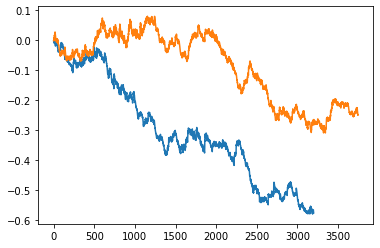

In [ ]:
for i in range(bunruisuu):
  plt.plot(range(len(df_label_1h[i])),df_label_1h[i].iloc[:,7])


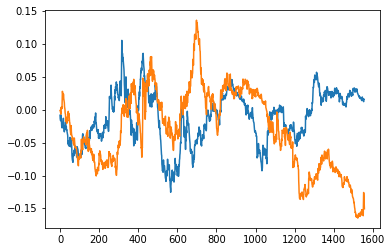

In [ ]:
for i in range(bunruisuu):
  plt.plot(range(len(df_label_1d[i])),df_label_1d[i].iloc[:,7])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cd5021748>]],
      dtype=object)

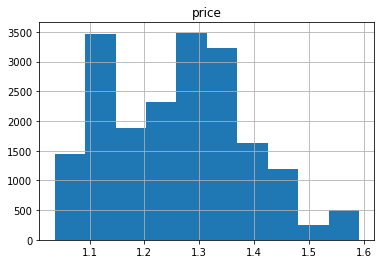

In [ ]:
df_label_1h[0].hist()

In [ ]:
df_label_1h[1].tail(60)

,date,direction,price,profit,predict_1d,predict_1h,predict_5m,ruiseki
25057,2019-12-13 21:50:00,買,1.11217,-0.00079,0,1,2,-1.1715
25071,2019-12-18 08:00:00,買,1.11343,-0.00044,0,1,2,-1.17194
25075,2019-12-18 17:45:00,買,1.11252,-0.00136,0,1,0,-1.1733
25077,2019-12-18 21:35:00,買,1.11196,-0.00057,0,1,2,-1.17387
25087,2019-12-20 06:30:00,買,1.11166,-0.00036,2,1,2,-1.17423
25091,2019-12-20 21:55:00,買,1.10742,-0.0001,1,1,2,-1.17433
25105,2019-12-24 14:20:00,買,1.10770,0.00055,1,1,2,-1.17378
25133,2020-01-02 15:20:00,買,1.11942,-0.00074,0,1,2,-1.17452
25135,2020-01-02 18:00:00,買,1.11996,-0.00302,0,1,0,-1.17754
25137,2020-01-02 23:10:00,買,1.11711,-5e-05,0,1,2,-1.17759


In [ ]:
df_label_1h[1].to_csv('./drive/My Drive/Colab Notebooks/5m_eurusd_hl30_break_1hkudari10_uhehe_break_buy_rule1.csv',encoding='utf_8_sig')

In [ ]:
# for i in range(1):
#   print(df_label[i].shape)
#   plt.plot(np.array(df_label[i].index),np.array(df_label[i]['ruiseki']))



In [ ]:
# for i in range(1,2):
#   print(df_label[i].shape)
#   plt.plot(np.array(df_label[i].index),np.array(df_label[i]['ruiseki']))

In [ ]:
# np.array(df_label[0].index)
# print(np.array(df_label[0]['predict']))

売買瞬間の直前足までで日足、時間足、５分足をそれぞれ２０本ずつ用意して、
日足
時間足
５分足
という60行4列で４グループにウォード法ではじめから３万取引分クラスタリングしたところ、
利益情報なしでグループわけさせて、あとから利益を集計すると
利益になる2グループ
やるだけスプレッド損する１グループ
やって損失ぶっこむ１グループ
に結構ちゃんと分かれた。

このグループ分けを、全期間からランダム抽出したデータ３万個とかで行って、
新たな取引の瞬間の状況をどのグループに属するか判定できれば、けっこう利益を生めるかも。

df_result_buyに対して有効なクラスタリング
最長距離法＞ウォード法＝k-means++＞ゴミ＞群平均法＞最短距離法
予測を使うにはk-means++しか選べない
いろいろ試した結果、k = 2が最も成績よい。特にランダムシード0で、前半３分の２にあたる２万取引から1万とりひきをランダムに選んでクラスタリングしたものを全期間に適応するとよい。さらいｎ、１時間足と５分足だけでやったら、日足を加えたときに比べて利益が倍以上になった。かなり強い。５分足だけでクラスタリングすると成績悪い。1hと5mでローソクの本数を減らすと、日足で上げ相場のみ好成績になっていく傾向がある。ローソク数は２０前後が最も成績よい。
混合ガウス分布ではだめ。混合ガウスではkを変えてもいい具合にわかれない
スペクトルクラスタリング（kmeansのカーネル法)でもダメだった

取引結果の損益をラベル分けして、ローソク情報からクラス分けさせようとすると、深層学習では全然だめで、全部の取引を買いか売りか一つだけの予想をバーッと並べるだけ。ちなそういうやりかあの教師あり学習はあんまうまくいかない。k近傍法もk=1,3,5でダメだった。


k-meansで適当なトレンドみたいなダミーデータを用意して上下対称にするだけでおｋ。特に１時間足の直前確定足から２０本でk-meansで上下トレンドに近似させるととてもいい成績が出る。
値動きの最小刻みが1センのときは成績微妙だけど、刻みが0.1センになるとマジ強い。
このトレンド判定はボリンジャーバンド２０期間２σの逆張りでも有効
HLでは、エントリー→→エグジット→→エントリー２→→エグジット２の順に損にならない限り持ち続けると全体の利益が上がる。倍くらい。ドローダウンもそんなに変わらない。